
# Laboratorio: Red Neuronal con MNIST  
**Curso:** Machine Learning  
**Total puntos:** 10

**Objetivo:** Implementar una red neuronal simple para clasificar dígitos escritos a mano del conjunto de datos MNIST utilizando Python y Keras.



## Paso 1: Cargar el conjunto de datos MNIST (1 punto)

Ejecuta el siguiente bloque para descargar y explorar el conjunto de datos.


In [1]:

from tensorflow.keras.datasets import mnist

# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Tamaño del set de entrenamiento:", x_train.shape)
print("Tamaño del set de test:", x_test.shape)


2025-05-18 10:15:12.429044: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-18 10:15:12.542252: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-18 10:15:12.600064: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747577712.706947  443293 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747577712.733554  443293 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747577712.836987  443293 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Tamaño del set de entrenamiento: (60000, 28, 28)
Tamaño del set de test: (10000, 28, 28)



## Paso 2: Visualizar ejemplos del dataset (1 punto)

✏️ **Slot para completar:** Visualiza al menos 5 imágenes con sus etiquetas utilizando `matplotlib.pyplot.imshow()`.


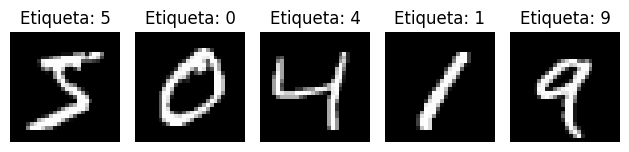

In [3]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()




## Paso 3: Preprocesamiento (1 punto)

✏️ **Slot para completar:** 
- Normaliza las imágenes (divide por 255.0).
- Aplana cada imagen a un vector de 784 valores.
- Codifica las etiquetas con `to_categorical`.


In [4]:

# COMPLETA AQUÍ: Normalización, flattening y codificación one-hot
from tensorflow.keras.utils import to_categorical

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


## Paso 4: Definir la red neuronal (2 puntos)

✏️ **Slot para completar:** 
- Crea un modelo `Sequential`.
- Agrega una capa oculta con activación ReLU.
- Agrega una capa de salida con activación Softmax.
- Compila el modelo con `adam` y `categorical_crossentropy`.


In [5]:

# COMPLETA AQUÍ: Definición y compilación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))  # capa oculta
model.add(Dense(10, activation='softmax'))  # capa de salida

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



/home/furzua/Utal-2025/ML/machine-learning/tf_env/lib64/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-18 10:18:14.194004: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)



## Paso 5: Entrenar el modelo (1 punto)

✏️ **Slot para completar:** Entrena el modelo con `fit` durante 5 épocas y batch size 32.


In [6]:

# COMPLETA AQUÍ: Entrenamiento del modelo
model.fit(x_train, y_train, epochs=5, batch_size=32)


Epoch 1/5


2025-05-18 10:18:40.294218: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8825 - loss: 0.4167
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9646 - loss: 0.1188
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9765 - loss: 0.0791
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9826 - loss: 0.0584
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9877 - loss: 0.0405



## Paso 6: Evaluar el modelo (1 punto)

✏️ **Slot para completar:** Evalúa el modelo con `evaluate()` en el conjunto de prueba.


In [7]:

# COMPLETA AQUÍ: Evaluación del modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Precisión en el set de prueba: {test_acc:.4f}")


2025-05-18 10:19:45.435494: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9732 - loss: 0.0844
Precisión en el set de prueba: 0.9764


## Preguntas de Reflexión (3 puntos en total)

### 1. ¿Qué ventaja observas al usar codificación one-hot para las etiquetas? (0.5 punto)

La ventaja es que así el modelo entiende mejor que cada número es una clase distinta. Si solo usáramos los números tal cual (0, 1, 2...), podría pensar que uno es más grande que otro, cuando en realidad solo son etiquetas diferentes.

### 2. ¿Qué ocurre si aumentas o disminuyes el número de neuronas ocultas? (0.5 punto)

Si se aumentan las neuronas, el modelo puede aprender cosas más complejas, pero también puede tardar más en entrenar o puede aprender cosas que no sirven (como ruido). Por otro lado, reducir demasiado la cantidad de neuronas puede hacer que el modelo sea demasiado simple y no tenga suficiente capacidad para aprender patrones relevantes lo que lleva a un bajo rendimiento tanto en entrenamiento como en prueba **subajuste**, La clave está en encontrar un equilibrio adecuado

### 3. ¿Qué alternativa propondrías al optimizador `adam` y por qué? (0.5 punto)

Una alternativa a adam es RMSprop. Ambos ajustan la tasa de aprendizaje automáticamente, pero Adam combina el promedio del gradiente y el promedio del cuadrado del gradiente, mientras que RMSprop solo usa este último. Adam suele ser más rápido y estable en general, pero RMSprop puede funcionar mejor en tareas secuenciales o donde hay mucho ruido

### 4. ¿Cómo cambia el desempeño si entrenas más épocas? ¿Cuál es el riesgo? (0.5 punto)

Al aumentar el número de épocas, el modelo tiene más oportunidades de ajustar sus pesos y reducir el error en los datos de entrenamiento, Sin embargo, entrenar por demasiadas épocas puede llevar al sobreajuste ya que el modelo comienza a aprender patrones específicos del conjunto de entrenamiento, lo cual disminuye su capacidad de generalizar a nuevos datos

### 5. ¿Por qué es importante dividir en conjuntos de entrenamiento y prueba? (1 punto)

Es fundamental para evaluar la capacidad de generalización del modelo. El conjunto de entrenamiento se utiliza para ajustar los pesos del modelo, mientras que el conjunto de prueba, que nunca ha sido visto durante el entrenamiento, se usa para medir el rendimiento del modelo en datos nuevos. Esta división permite detectar si el modelo está cayendo en un sobreajuste
